### 참고

In [1]:
import numpy as np
from scipy.sparse import csr_matrix
import torch

__author__ = 'Andrea Esuli'

Acsr = csr_matrix([[1, 2, 0], [0, 0, 3], [4, 0, 5]])
print('Acsr',Acsr)

Acoo = Acsr.tocoo()
print('Acoo',Acoo)

Apt = torch.sparse.LongTensor(torch.LongTensor([Acoo.row.tolist(), Acoo.col.tolist()]),
                              torch.LongTensor(Acoo.data.astype(np.int32)))

print(Acoo.row.tolist())
print(Acoo.col.tolist())
print([Acoo.row.tolist(), Acoo.col.tolist()])
print(Acoo.data)

Apt
Acoo.data.astype
Acsr.tocoo()

Acsr   (0, 0)	1
  (0, 1)	2
  (1, 2)	3
  (2, 0)	4
  (2, 2)	5
Acoo   (0, 0)	1
  (0, 1)	2
  (1, 2)	3
  (2, 0)	4
  (2, 2)	5
[0, 0, 1, 2, 2]
[0, 1, 2, 0, 2]
[[0, 0, 1, 2, 2], [0, 1, 2, 0, 2]]
[1 2 3 4 5]


<3x3 sparse matrix of type '<class 'numpy.intc'>'
	with 5 stored elements in COOrdinate format>

In [ ]:
    def __init__(self, AF, labels, weight_channel):
        super(mymodule, self).__init__()
        self.AF = AF
        self.labels = labels

        # weight 크기 설정에 따라 node_feature 가 업데이트 될 수 있게
        self.weight_channel = weight_channel

        # csr_matrix to tensor
        self.temp1 = self.AF.tocoo()
        self.temp2 = torch.sparse.Tensor([self.temp1.row.tolist(),
                                        self.temp1.col.tolist()])

        self.weight = Parameter(torch.Tensor(np.random.rand(self.AF.size,
                                                            self.weight_channel)))
        self.bias = Parameter(torch.Tensor(np.random.rand(self.weight_channel,
                                                          1)))

        self.bias = self.bias.unsqueeze(1)

        # AF X Weight + bias
        self.cal = torch.matmul(self.temp2, self.weight)
        self.cal2 = torch.add(self.cal, self.bias)

In [ ]:
# 네트워크 초기화
# custom weights initialization called on netG and netD
b
def weights_init(m) :
    classname = m.__class__.__name__
    if classname.find('Conv') != -1 :
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1 :
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

In [ ]:
def _initialize_weights(self):
        for m in self.modules():
            
            if isinstance(m, nn.Conv2d):
                # kaiming_normalizaion : 어떤 
                nn.init.kaiming_normal_(m.weight, 
                                        mode='fan_out', 
                                        nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
                    
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
                
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

In [ ]:
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

In [68]:
def myreg(W, Y): # features, labels
    from numpy.linalg import pinv
    m, n = Y.shape # features, labels
    k = W.shape[1] # 열 개수
    print('k : {}'.format(k))
    X = pinv(W.T.dot(W)).dot(W.T).dot(Y)
    Y_hat = W.dot(X)
    Residuals = Y_hat - Y # 잔차 계산
    MSE = np.square(Residuals).sum(axis=0) / (m - 2)
    X_var = (MSE[:, None] * pinv(W.T.dot(W)).flatten()).reshape(n, k, k)
    Tstat = X / np.sqrt(X_var.diagonal(axis1=1, axis2=2)).T
    return X, Tstat

In [69]:
W = np.array([
        [ 1, -1,  0,  0,  1],
        [ 0, -1,  1,  0,  0],
        [ 1,  0,  0,  1,  0],
        [ 0,  1, -1,  0,  1],
        [ 1, -1,  0,  0, -1],
    ])

Y = np.array([2, 4, 1, 5, 3])[:, None]

X, V = myreg(W, Y)

k : 5


# 1

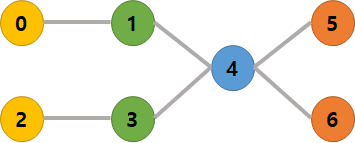

In [36]:
import numpy as np
import scipy.sparse as sp
import torch
import pandas as pd

In [37]:
# data
#노드 연결 정보
edges = np.array([[0 ,1],[2 ,3],[1 ,4],[3 ,4],[4 ,5],[4 ,6]])
# 각 노드 특성 정보(H) = 7 X 4
features = sp.csr_matrix([[1, 0, 0, 0],[0, 1, 0, 0],[1, 0, 0, 0],[0, 1, 0, 0],[0, 0, 1, 0],[0, 0, 0, 1],[0, 0, 0, 1]])
# edge 특성 정보
edge_features = [[3],[5],[1],[10],[6],[8]]
# labels 
labels = np.array([1,4,5,2,6,3,0])

# 단위 행렬 더해주기
# direction matrix 생성
adj = sp.coo_matrix((np.ones(edges.shape[0]), (edges[:,0], edges[:,1])),
             shape = (labels.shape[0], labels.shape[0]),
             dtype = np.float32)
adj = adj + sp.eye(adj.shape[0])

In [47]:
# normalize
def normalize(mx) :
    rowsum = np.array(mx.sum(1)) # 각 노드 정보 개수
    print('=====row별 feature 특성 합=====')
    #print(rowsum)

    # r_inv
    # 역행렬로 np.power 수행
    r_inv = np.power(rowsum, 0).flatten() # 0, 1, # power : 0, 1, 8, 27, ,,, / 0, 1, 4, 9, ,,, / 0, 1, 0.5, 0.333, 0.25
    print('===== 역행렬로 np.power 수행 =====')
    r_inv[np.isinf(r_inv)] = 0 
    #print(r_inv)
    
    # r_mat_inv
    r_mat_inv = sp.diags(r_inv) # 행렬로 만들어줌
    #print(r_mat_inv.toarray())
    
    # 노드 adj 와 노드 feature 정보 행렬연산
    print('=====adj, feature 행렬곱=====') 
    mx = r_mat_inv.dot(mx) 

    print(mx.toarray())
    return mx

In [39]:
features = normalize(features)
adj = normalize(adj) # 대각행렬

# 행렬곱을 위한 array 
adj_arr = adj.toarray()
features_arr = features.toarray()

# hop 에 따라 정보 전달
hop = 2
for idx in range(hop) :
    features_arr = np.matmul(adj_arr, features_arr) # 여기에 weight 곱하기, bias 더하기
    print('======{0}번째======'.format(idx+1))
    print('{}'.format(features_arr))

=====row별 feature 특성 합=====
===== 역행렬로 np.power 수행 =====
=====adj, feature 행렬곱=====
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
=====row별 feature 특성 합=====
===== 역행렬로 np.power 수행 =====
=====adj, feature 행렬곱=====
[[1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
======1번째======
[[1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [1. 1. 0. 0.]
 [0. 1. 1. 0.]
 [0. 0. 1. 2.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
======2번째======
[[1. 2. 1. 0.]
 [0. 1. 2. 2.]
 [1. 2. 1. 0.]
 [0. 1. 2. 2.]
 [0. 0. 1. 4.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [40]:
idx_train = range(5)
features = torch.FloatTensor(np.array(features_arr)) # .todense()
labels = torch.LongTensor(labels) # 원핫인코딩 된 label 중 해당하는 label이 몇 번 째인지
print(labels)

def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """Convert a scipy sparse matrix to a torch sparse tensor."""
    sparse_mx = sparse_mx.tocoo().astype(np.float32)

    # 노드
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64)) # vstack : 행 추가
    # 노드 간 edge의 정보
    values = torch.from_numpy(sparse_mx.data) # numpy.ndarray를 tensor로 올려줌
    # 노드 개수, 특성 개수
    shape = torch.Size(sparse_mx.shape)

    return torch.sparse.FloatTensor(indices, values, shape) # sparse : 크기에 맞게 값을 뿌려주는 것 같은데 규칙 잘 모르겠다

t = sparse_mx_to_torch_sparse_tensor(adj)
t

tensor([1, 4, 5, 2, 6, 3, 0])


tensor(indices=tensor([[0, 0, 1, 2, 2, 3, 1, 3, 4, 4, 5, 4, 6],
                       [0, 1, 1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6]]),
       values=tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
       size=(7, 7), nnz=13, layout=torch.sparse_coo)

In [41]:
## 확인
# print('===단위행렬 더하기 전===')
# print('{}'.format(adj))
# print(adj.toarray())
# print()

## 고려할 것 : 단위행렬(자기자신의 정보) 전달
#adj = adj + sp.eye(adj.shape[0])
#print('===단위행렬 더한 후===')
#print('{}'.format(adj))
#print(adj.toarray())

# num_nodes = max + 1 = 7
# num_edges = len(edges) = 6

# edge정보를 어떻게 맞춰줄것인가_dimension

# feature 정보 학습, label regression



In [42]:
from today_third import mymodule
mymodule(adj, labels, 2)

============= Input 값 확인 =============
AF.size : 13
weight_channel : 2
==================csr_matrix to tensor==============================
temp1.row : 13
temp1.col : 13
temp2.size : torch.Size([2, 13])
======================weight, bias 설정==============================
Parameter containing:
tensor([[0.3452],
        [0.4532]], requires_grad=True)
tensor([[[0.3452]],

        [[0.4532]]], grad_fn=<UnsqueezeBackward0>)
========================= calculate ======================
tensor([[21.5024, 21.1556],
        [25.1407, 25.2825]], grad_fn=<MmBackward>)
tensor([[[21.8476, 21.5007],
         [25.4859, 25.6276]],

        [[21.9556, 21.6088],
         [25.5939, 25.7356]]], grad_fn=<AddBackward0>)
========================= process =========================
  (0, 1)	1.0
  (0, 0)	1.0
  (1, 4)	1.0
  (1, 1)	1.0
  (2, 3)	1.0
  (2, 2)	1.0
  (3, 4)	1.0
  (3, 3)	1.0
  (4, 6)	1.0
  (4, 5)	1.0
  (4, 4)	1.0
  (5, 5)	1.0
  (6, 6)	1.0 x Parameter containing:
tensor([[0.0915, 0.8440],
        [0.4047, 

In [20]:
from today_fourth import *

for epoch in range(2) :
    a = mymodel(adj, labels, 2)
    print(a.forward())

init 시작
  (0, 1)	1.0
  (0, 0)	1.0
  (1, 4)	1.0
  (1, 1)	1.0
  (2, 3)	1.0
  (2, 2)	1.0
  (3, 4)	1.0
  (3, 3)	1.0
  (4, 6)	1.0
  (4, 5)	1.0
  (4, 4)	1.0
  (5, 5)	1.0
  (6, 6)	1.0
[0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 4, 5, 6]
[1, 0, 4, 1, 3, 2, 4, 3, 6, 5, 4, 5, 6]
weight : Parameter containing:
tensor([[ 0.2727,  0.5237],
        [-0.2759, -0.3060],
        [ 0.1658,  0.1266],
        [ 0.5454, -0.3601],
        [ 0.1306,  0.2945],
        [-0.3975,  0.0127],
        [ 0.3219, -0.2677],
        [ 0.0980, -0.5871],
        [-0.5026, -0.2000],
        [-0.0759,  0.1696],
        [ 0.1548,  0.1688],
        [ 0.4528, -0.4336],
        [ 0.3609, -0.4481]], requires_grad=True), bias : Parameter containing:
tensor([[-0.2329],
        [-0.5525]], requires_grad=True)
1end
forward 시작
2end
tensor([[3.9386, 0.0000],
        [3.7605, 0.0000]], grad_fn=<ReluBackward0>)
init 시작
  (0, 1)	1.0
  (0, 0)	1.0
  (1, 4)	1.0
  (1, 1)	1.0
  (2, 3)	1.0
  (2, 2)	1.0
  (3, 4)	1.0
  (3, 3)	1.0
  (4, 6)	1.0
  (4, 5)	1.0
 

# 전처리

In [43]:
import numpy as np
import scipy.sparse as sp
import torch
import pandas as pd

In [55]:
# data
#노드 연결 정보
edges = np.array([[0 ,1],[2 ,3],[1 ,4],[3 ,4],[4 ,5],[4 ,6]])
# 각 노드 특성 정보(H) = 7 X 4
features = sp.csr_matrix([[1, 0, 0, 0],[0, 1, 0, 0],[1, 0, 0, 0],[0, 1, 0, 0],[0, 0, 1, 0],[0, 0, 0, 1],[0, 0, 0, 1]])
# edge 특성 정보
edge_features = [[3],[5],[1],[10],[6],[8]]
# labels 
labels = np.array([1,4,5,2,6,3,0])

# 단위 행렬 더해주기
# direction matrix 생성
adj = sp.coo_matrix((np.ones(edges.shape[0]), (edges[:,0], edges[:,1])),
             shape = (labels.shape[0], labels.shape[0]),
             dtype = np.float32)
adj = adj + sp.eye(adj.shape[0])

In [57]:
np.matmul(adj.toarray(), features.toarray())

array([[1., 1., 0., 0.],
       [0., 1., 1., 0.],
       [1., 1., 0., 0.],
       [0., 1., 1., 0.],
       [0., 0., 1., 2.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [29]:
import torch
torch.FloatTensor(normalize(adj).toarray())


print(adj.tocoo())

=====row별 feature 특성 합=====
===== 역행렬로 np.power 수행 =====
=====adj, feature 행렬곱=====
[[1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
  (0, 0)	1.0
  (0, 1)	1.0
  (1, 1)	1.0
  (1, 4)	1.0
  (2, 2)	1.0
  (2, 3)	1.0
  (3, 3)	1.0
  (3, 4)	1.0
  (4, 4)	1.0
  (4, 5)	1.0
  (4, 6)	1.0
  (5, 5)	1.0
  (6, 6)	1.0


In [11]:
# features, adj 생으로 그냥 들어가면

# 1. normalize -> tensor에 올림
#    labels -> tensor에 올림

# 2. A,F  matmul

# 3. F1 = AF * W ( convolution1 _ weight_channel1 )

# 4. F2 = AF1 * W ( convolution2 _ weight_channel2 ) : W.shape = (weight_channel1 X wight_channel2)

In [35]:
from today_fifth import *

mymodel5(adj, features, labels, weight_channel=(5,1))

=================init 시작=====================


AttributeError: 'numpy.ndarray' object has no attribute 'toarray'

# 2

In [9]:
import numpy as np
import scipy.sparse as sp
import torch
import pandas as pd

#노드 연결 정보
edges = np.array([[0 ,1], [2 ,3], [1 ,4], [3 ,4],[4 ,5],[4 ,6]])

# 각 노드 특성 정보(H) = 7 X 4
features = sp.csr_matrix([[1, 0, 0, 0],
                          [0, 1, 0, 0],
                          [1, 0, 0, 0],
                          [0, 1, 0, 0],
                          [0, 0, 1, 0],
                          [0, 0, 0, 1],
                          [0, 0, 0, 1]])

# edge 특성 정보
edge_features = [[3],[5], [1],[10], [6],[8]]

# labels 
labels = np.array([1, 4, 5, 2, 6,3,0])

# 단위 행렬 더해주기
# direction matrix 생성
adj = sp.coo_matrix((np.ones(edges.shape[0]), (edges[:,0], edges[:,1])),
             shape = (labels.shape[0], labels.shape[0]),
             dtype = np.float32)
## 확인
print('===단위행렬 더하기 전===')
print('{}'.format(adj))
print(adj.toarray())
print()

## 고려할 것 : 단위행렬(자기자신의 정보) 전달
#adj = adj + sp.eye(adj.shape[0])
#print('===단위행렬 더한 후===')
#print('{}'.format(adj))
#print(adj.toarray())
def normalize(mx) :
    rowsum = np.array(mx.sum(1)) # 각 노드 정보 개수
    #print('=====row별 feature 특성 합=====')
    #print(rowsum)
    
    # r_inv
    # 역행렬로 np.power 수행
    r_inv = np.power(rowsum, 0).flatten() # 0, 1, # power : 0, 1, 8, 27, ,,, / 0, 1, 4, 9, ,,, / 0, 1, 0.5, 0.333, 0.25
    #print('===== 역행렬로 np.power 수행 =====')
    r_inv[np.isinf(r_inv)] = 0 
    #print(r_inv)

    # r_mat_inv
    r_mat_inv = sp.diags(r_inv) # 행렬로 만들어줌
    #print(r_mat_inv.toarray())
    
    # 노드 adj 와 노드 feature 정보 행렬연산
    print('=====adj, feature 행렬곱=====')
    mx = r_mat_inv.dot(mx) 
    print(mx.toarray())
    return mx

# num_nodes = max + 1 = 7
# num_edges = len(edges) = 6

num_nodes = 7
num_edges = len(edges)

# direction matrix 생성
adj = sp.coo_matrix((np.ones(edges.shape[0]), (edges[:, 0], edges[:, 1])),
                    shape=(labels.shape[0], labels.shape[0]),
                    dtype=np.float32)

## 고려할 것 : 단위행렬(자기자신의 정보) 전달
# adj = adj + sp.eye(adj.shape[0])
# print('===단위행렬 더한 후===')
# print(adj.toarray())

# edge정보를 어떻게 맞춰줄것인가_dimension

# 행렬곱을 위한 array 
adj_arr = adj.toarray()
features_arr = features.toarray()

# hop 에 따라 정보 전달
hop = 2
for idx in range(hop) :
    features_arr = np.matmul(adj_arr, features_arr) # 여기에 weight 곱하기, bias 더하기
    print('======{0}번째======'.format(idx+1))
    print('{}'.format(features_arr))
    
    
# feature 정보 학습, label regression


# features : 현재 노드 + 연결된 노드 정보
features = normalize(features)

adj = normalize(adj + sp.eye(adj.shape[0])) # 대각행렬

idx_train = range(5)
features = torch.FloatTensor(np.array(features.todense()))
labels = torch.LongTensor(labels) # 원핫인코딩 된 label 중 해당하는 label이 몇 번 째인지
print(labels)

===단위행렬 더하기 전===
  (0, 1)	1.0
  (2, 3)	1.0
  (1, 4)	1.0
  (3, 4)	1.0
  (4, 5)	1.0
  (4, 6)	1.0
[[0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]

======1번째======
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 2.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
======2번째======
[[0. 0. 1. 0.]
 [0. 0. 0. 2.]
 [0. 0. 1. 0.]
 [0. 0. 0. 2.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
=====adj, feature 행렬곱=====
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
=====adj, feature 행렬곱=====
[[1. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]
tensor([1, 4, 5, 2, 6, 3, 0])


In [10]:
def sparse_mx_to_torch_sparse_tensor(sparse_mx):
    """Convert a scipy sparse matrix to a torch sparse tensor."""
    sparse_mx = sparse_mx.tocoo().astype(np.float32)

    # 노드
    indices = torch.from_numpy(
        np.vstack((sparse_mx.row, sparse_mx.col)).astype(np.int64)) # vstack : 행 추가

    # 노드 간 edge의 정보
    values = torch.from_numpy(sparse_mx.data) # numpy.ndarray를 tensor로 올려줌

    # 노드 개수, 특성 개수
    shape = torch.Size(sparse_mx.shape)

    return torch.sparse.FloatTensor(indices, values, shape) # sparse : 크기에 맞게 값을 뿌려주는 것 같은데 규칙 잘 모르겠다.

adj = sparse_mx_to_torch_sparse_tensor(adj)
adj

tensor(indices=tensor([[0, 0, 1, 2, 2, 3, 1, 3, 4, 4, 5, 4, 6],
                       [0, 1, 1, 2, 3, 3, 4, 4, 4, 5, 5, 6, 6]]),
       values=tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
       size=(7, 7), nnz=13, layout=torch.sparse_coo)